In [9]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor

startDate = datetime(2012,12,1)
endDate = datetime(2021,12,1)

In [2]:
#clean data functions
sector_dict={
            'S&P 500 Materials Sector GICS Level 1 Index': 'material',
            'S&P 500 Energy Sector GICS Level 1 Index':	'energy',
            'S&P 500 Industrials Sector GICS Level 1 Index':'industrial',
            'S&P 500 Consumer Discretionary Sector GICS Level 1 Index':'consumer_discretionary',
            'S&P 500 Consumer Staples Sector GICS Level 1 Index':'consumer_staple',
            'S&P 500 Health Care Sector GICS Level 1 Index':'health_care',
            'S&P 500 Information Technology Sector GICS Level 1 Index':'IT',
            'S&P 500 Financials Sector GICS Level 1 Index': 'financial',
            'S&P 500 Real Estate Sector GICS Level 1 Index': 'real_estate',
            'S&P 500 Utilities Sector GICS Level 1 Index': 'utility',
            'S&P 500 Communication Services Sector GICS Level 1 Index':'telecom'
            }

sector_list = ['energy','material','industrial','consumer_discretionary','consumer_staple','health_care','financial','IT','telecom','utility','real_estate']

def clean_fdmt_data(df):
    df=df.drop(columns=['Unnamed: 0'])
    df=df.rename(columns={'3 Months Ending':'Dates'})
    df=df.set_index('Dates')
    df=df.rename(columns=sector_dict)
    df=df.truncate(after=endDate)
    return(df)

def factor_neutralize(df):
    df_cal=df.dropna()
    df_mean = df_cal.mean(axis=0)
    df_std = df_cal.std(axis=0)
    df_neutral = (df-df_mean)/df_std
    return(df_neutral)

def get_factor_exposure(sector):
    rename_dict={sector:'PE'}
    PE_exposures=PE_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'PB'}
    PB_exposures=PB_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'EV2Sales'}
    EV2Sales_exposures=EV2Sales_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'EV2EBIT'}
    EV2EBIT_exposures=EV2EBIT_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'EV2EBITDA'}
    EV2EBITDA_exposures=EV2EBITDA_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'DIV_Y'}
    DIV_Y_exposures=DIV_Y_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'GM'}
    GM_exposures=GM_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'OM'}
    OM_exposures=OM_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'PM'}
    PM_exposures=PM_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'ROA'}
    ROA_exposures=ROA_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    rename_dict={sector:'ROE'}
    ROE_exposures=ROE_neutral[sector].fillna(value=0).to_frame().rename(columns=rename_dict)

    factor_exposure=PE_exposures.join(PB_exposures).join(EV2Sales_exposures).join(EV2EBIT_exposures).join(EV2EBITDA_exposures).join(DIV_Y_exposures).join(GM_exposures).join(OM_exposures).join(PM_exposures).join(ROA_exposures).join(ROE_exposures)

    return(factor_exposure)



#import&clean Data
#PE ratio
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/PE Ratio.xlsx',parse_dates=['3 Months Ending'])
PE_df=clean_fdmt_data(df)
PE_neutral=factor_neutralize(PE_df)


#PB ratio
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/PB Ratio.xlsx',parse_dates=['3 Months Ending'])
PB_df=clean_fdmt_data(df)
PB_neutral=factor_neutralize(PB_df)

#EV2Sales
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/EV2Sales.xlsx',parse_dates=['3 Months Ending'])
EV2Sales_df=clean_fdmt_data(df)
EV2Sales_neutral=factor_neutralize(EV2Sales_df)

#EV2EBIT
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/EV2EBIT.xlsx',parse_dates=['3 Months Ending'])
EV2EBIT_df=clean_fdmt_data(df)
EV2EBIT_neutral=factor_neutralize(EV2EBIT_df)

#EV2EBITDA
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/EV2EBITDA.xlsx',parse_dates=['3 Months Ending'])
EV2EBITDA_df=clean_fdmt_data(df)
EV2EBITDA_neutral=factor_neutralize(EV2EBITDA_df)

#Dividend Yield
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/Dividend Yield.xlsx',parse_dates=['3 Months Ending'])
DIV_Y_df=clean_fdmt_data(df)
DIV_Y_neutral=factor_neutralize(DIV_Y_df)

#Gross Margin
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/Gross Margin.xlsx',parse_dates=['3 Months Ending'])
GM_df=clean_fdmt_data(df)
GM_neutral=factor_neutralize(GM_df)

#Operating Margin
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/operatingmargin.xlsx',parse_dates=['3 Months Ending'])
OM_df=clean_fdmt_data(df)
OM_neutral=factor_neutralize(OM_df)

#profit Margin
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/profit margin.xlsx',parse_dates=['3 Months Ending'])
PM_df=clean_fdmt_data(df)
PM_neutral=factor_neutralize(PM_df)

#return on asset
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/return on asset.xlsx',parse_dates=['3 Months Ending'])
ROA_df=clean_fdmt_data(df)
ROA_neutral=factor_neutralize(ROA_df)

#return on equity
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/return on equity.xlsx',parse_dates=['3 Months Ending'])
ROE_df=clean_fdmt_data(df)
ROE_neutral=factor_neutralize(ROE_df)

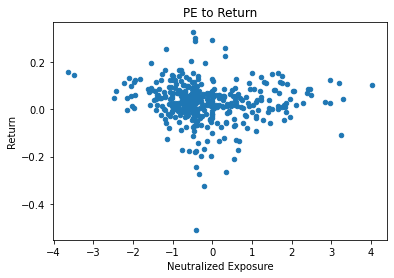

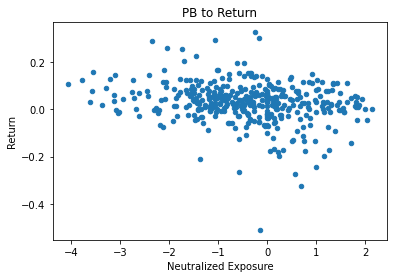

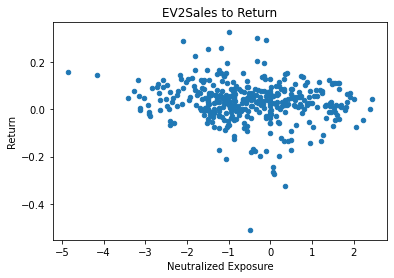

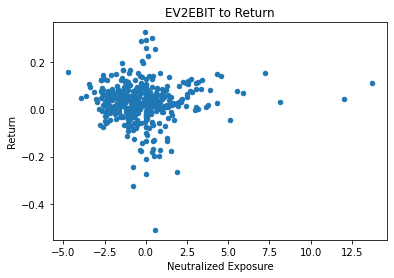

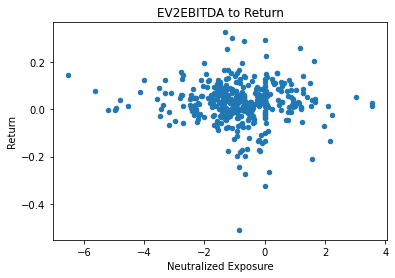

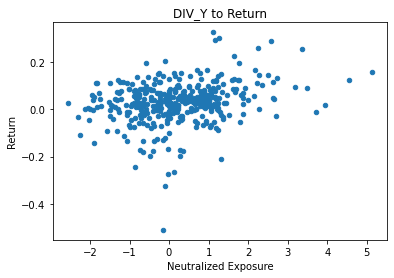

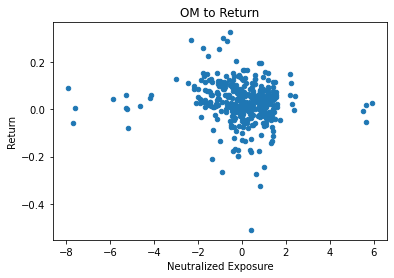

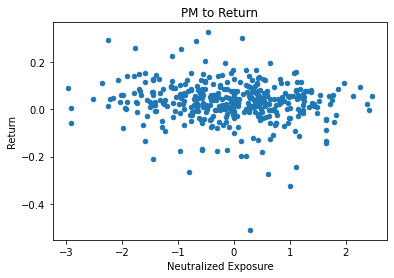

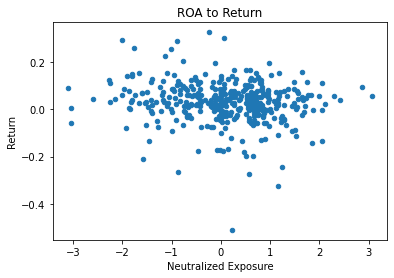

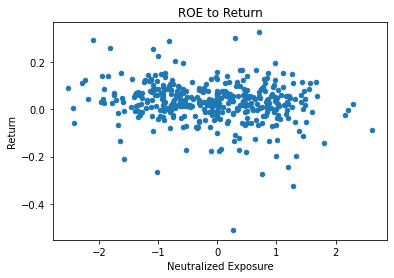

In [3]:
'''
---------------------------------------------------- Return to Factor Exposure------------------------------------------------------------------------------------
'''

sector_index=pd.read_csv('/Users/JackRitian/Desktop/sector rotation/data/index data/sector_index.csv',parse_dates=['Date'])
sector_index=sector_index.set_index('Date').truncate(before=startDate,after=endDate)
quarterly_index_rtn=sector_index.resample("Q").last().pct_change().shift(-1).dropna()

def exposure_to_return(factor,plot): #on a factor base
    exposures=[]
    returns=[]
    for sector in sector_list:
        factor_exposure=get_factor_exposure(sector)
        factor_exposure=factor_exposure.truncate(after=endDate)

        for exposure in factor_exposure[factor]:
            exposures.append(exposure)
        for rtn in quarterly_index_rtn[sector]:
            returns.append(rtn)


    exposure_to_return={'Neutralized Exposure':exposures,'Return':returns}
    df=pd.DataFrame(exposure_to_return)

    if plot == True:
        df.plot.scatter(x='Neutralized Exposure',y='Return')
        plt.title(factor+' to Return')
    
    return(df)


factor_list=['PE','PB','EV2Sales','EV2EBIT','EV2EBITDA','DIV_Y','OM','PM','ROA','ROE']

for factor in factor_list:
    if factor == factor_list[0]:

        df = exposure_to_return(factor,True).rename(columns={'Neutralized Exposure':factor})
    else:
        new_df = exposure_to_return(factor,True).rename(columns={'Neutralized Exposure':factor}).drop(columns=['Return'])
        df=df.join(new_df)

In [69]:
def split_sets(df,factor_list,y_name,shuffle,normalized_return):
    
    #shuffle the set
    if shuffle == True:
        df = df.sample(frac=1).reset_index(drop=True)
        
    return_df = df.copy(deep=True)
    rtn_df = return_df['Return']
    
    mean = rtn_df.mean()
    std = rtn_df.std()
    
    if normalized_return == True:
        for i in range(0,len(df[y_name])):
            df.loc[i,y_name]=(rtn_df[i]-mean)/std
    
    first_cut=int(np.floor(0.6*len(df[y_name])))
    second_cut=int(np.floor(0.8*len(df[y_name])))

    Y_train = df[y_name][0:first_cut]
    X_train = df[factor_list][0:first_cut]
    rtn_train = rtn_df[0:first_cut]
    
    X_train = X_train.to_numpy()
    Y_train = Y_train.to_numpy()
    rtn_train = rtn_train.to_numpy()

    Y_valid = df[y_name][first_cut:second_cut]
    Y_valid = Y_valid.reset_index(drop=True)
    X_valid = df[factor_list][first_cut:second_cut]
    X_valid = X_valid.reset_index(drop=True)
    rtn_valid = rtn_df[first_cut:second_cut]
    rtn_valid = rtn_valid.reset_index(drop=True)
    X_valid = X_valid.to_numpy()
    Y_valid = Y_valid.to_numpy()
    rtn_valid = rtn_valid.to_numpy()
    
    Y_test = df[y_name][second_cut:]
    Y_test = Y_test.reset_index(drop=True)
    X_test = df[factor_list][second_cut:]
    X_test = X_test.reset_index(drop=True)
    rtn_test = rtn_df[second_cut:]
    rtn_test = rtn_test.reset_index(drop=True)
    X_test = X_test.to_numpy()
    Y_test = Y_test.to_numpy()
    rtn_test = rtn_test.to_numpy()

    return X_train, Y_train, rtn_train, X_valid, Y_valid, rtn_valid, X_test, Y_test, rtn_test

In [70]:
#on Time Series With no shuffle

def get_sector_exposure(sector,factor_list):    
    factor_exposure=get_factor_exposure(sector)
    factor_exposure=factor_exposure[factor_list].truncate(after=endDate)
    df = factor_exposure
    return df

startDate = datetime(2012,12,1)
endDate = datetime(2021,12,1)
date_list = quarterly_index_rtn.index.to_list()

for sector in sector_list:
    rtn_list=quarterly_index_rtn[sector].to_list()
    df =get_sector_exposure(sector,factor_list)
    df['Return'] = rtn_list
    df = df.reset_index(drop=True)

    X_train, Y_train, rtn_train, X_valid, Y_valid, rtn_valid, X_test, Y_test, rtn_test= split_sets(df,factor_list,'Return',False,False)

    if sector == sector_list[0]:
        X_train_total = X_train
        Y_train_total = Y_train
        rtn_train_total = rtn_train
        X_valid_total = X_valid
        Y_valid_total = Y_valid
        rtn_valid_total = rtn_valid
        X_test_total = X_test
        Y_test_total = Y_test
        rtn_test_total = rtn_test
    else:
        X_train_total = np.vstack((X_train_total, X_train))
        Y_train_total = np.hstack((Y_train_total,Y_train))
        rtn_train_total = np.hstack((rtn_train_total,rtn_train))
        X_valid_total = np.vstack((X_valid_total,X_valid))
        Y_valid_total = np.hstack((Y_valid_total,Y_valid))
        rtn_valid_total = np.hstack((rtn_valid_total,rtn_valid))
        X_test_total = np.vstack((X_test_total,X_test))
        Y_test_total = np.hstack((Y_test_total,Y_test))
        rtn_test_total = np.hstack((rtn_test_total,rtn_test))

In [71]:
Total_up_NO = 0
Total_down_NO = 0

for num in Y_train_total:
    if num >0:
        Total_up_NO += 1
    else:
        Total_down_NO +=1

print("There are",Total_up_NO,'possitive samples and', Total_down_NO,'negative samples in the training set ')

There are 160 possitive samples and 71 negative samples in the training set 


In [78]:
regr = MLPRegressor(random_state=1, max_iter=1000,hidden_layer_sizes=(10,10,10,10),solver='sgd')
regr.fit(X_train_total, Y_train_total)
print(regr.out_activation_)

identity


In [79]:
valid_y_pred=regr.predict(X_valid_total)
win_num=0
total_rtn=0
rtn_list=[]
trading_len = len(rtn_valid_total)/(11*4) # we have eleven sector with quarterly frequency, yields to 11*4 samples per year 

for i in range(0,len(valid_y_pred)):
    if valid_y_pred[i]>0 and Y_valid_total[i]>0:
        win_num += 1
        rtn = rtn_valid_total[i]
        rtn_list.append(rtn)
        total_rtn += rtn
    if valid_y_pred[i]<0 and Y_valid_total[i]<0:
        win_num += 1
        rtn = rtn_valid_total[i]
        rtn_list.append(rtn)
        total_rtn += rtn
    else:
        rtn = -rtn_valid_total[i]
        rtn_list.append(rtn)
        total_rtn += rtn
        
print(regr.score(X_valid_total, Y_valid_total))

sharpe_ratio=(np.mean(rtn_list)*4)/(np.std(rtn_list)*4**(1/2))
print('The winning rate on validation set is '+ str(win_num/len(valid_y_pred)))
print('The cumulative return on validation set is '+ str(total_rtn/trading_len))
print('The sharpe ratio is',sharpe_ratio)

-0.9173668395560617
The winning rate on validation set is 0.42857142857142855
The cumulative return on validation set is -2.199405936900355
The sharpe ratio is -1.0921391520997359


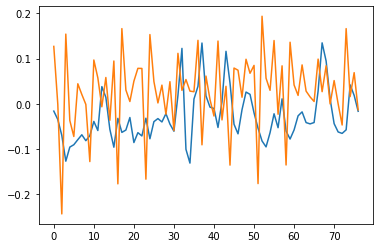

In [80]:
x=range(0,len(valid_y_pred))
plt.plot(x,valid_y_pred,x,Y_valid_total)

In [81]:
#on Time Series With no shuffle and normalized return

def get_sector_exposure(sector,factor_list):    
    factor_exposure=get_factor_exposure(sector)
    factor_exposure=factor_exposure[factor_list].truncate(after=endDate)
    df = factor_exposure
    return df

startDate = datetime(2012,12,1)
endDate = datetime(2021,12,1)
date_list = quarterly_index_rtn.index.to_list()

for sector in sector_list:
    rtn_list=quarterly_index_rtn[sector].to_list()
    df =get_sector_exposure(sector,factor_list)
    df['Return'] = rtn_list
    df = df.reset_index(drop=True)

    X_train, Y_train, rtn_train, X_valid, Y_valid, rtn_valid, X_test, Y_test, rtn_test= split_sets(df,factor_list,'Return',False,True)

    if sector == sector_list[0]:
        X_train_total = X_train
        Y_train_total = Y_train
        rtn_train_total = rtn_train
        X_valid_total = X_valid
        Y_valid_total = Y_valid
        rtn_valid_total = rtn_valid
        X_test_total = X_test
        Y_test_total = Y_test
        rtn_test_total = rtn_test
    else:
        X_train_total = np.vstack((X_train_total, X_train))
        Y_train_total = np.hstack((Y_train_total,Y_train))
        rtn_train_total = np.hstack((rtn_train_total,rtn_train))
        X_valid_total = np.vstack((X_valid_total,X_valid))
        Y_valid_total = np.hstack((Y_valid_total,Y_valid))
        rtn_valid_total = np.hstack((rtn_valid_total,rtn_valid))
        X_test_total = np.vstack((X_test_total,X_test))
        Y_test_total = np.hstack((Y_test_total,Y_test))
        rtn_test_total = np.hstack((rtn_test_total,rtn_test))

In [84]:
Total_up_NO = 0
Total_down_NO = 0

for num in Y_train_total:
    if num >0:
        Total_up_NO += 1
    else:
        Total_down_NO +=1

print("There are",Total_up_NO,'possitive samples and', Total_down_NO,'negative samples in the training set ')

There are 112 possitive samples and 119 negative samples in the training set 


In [85]:
regr = MLPRegressor(random_state=1, max_iter=1000,hidden_layer_sizes=(10,10,10,10),solver='sgd')
regr.fit(X_train_total, Y_train_total)
print(regr.out_activation_)

identity


In [86]:
valid_y_pred=regr.predict(X_valid_total)
win_num=0
total_rtn=0
rtn_list=[]
trading_len = len(rtn_valid_total)/(11*4) # we have eleven sector with quarterly frequency, yields to 11*4 samples per year 

for i in range(0,len(valid_y_pred)):
    if valid_y_pred[i]>0 and Y_valid_total[i]>0:
        win_num += 1
        rtn = rtn_valid_total[i]
        rtn_list.append(rtn)
        total_rtn += rtn
    if valid_y_pred[i]<0 and Y_valid_total[i]<0:
        win_num += 1
        rtn = rtn_valid_total[i]
        rtn_list.append(rtn)
        total_rtn += rtn
    else:
        rtn = -rtn_valid_total[i]
        rtn_list.append(rtn)
        total_rtn += rtn
        
print(regr.score(X_valid_total, Y_valid_total))

sharpe_ratio=(np.mean(rtn_list)*4)/(np.std(rtn_list)*4**(1/2))
print('The winning rate on validation set is '+ str(win_num/len(valid_y_pred)))
print('The cumulative return on validation set is '+ str(total_rtn/trading_len))
print('The sharpe ratio is',sharpe_ratio)


-0.02764752670791637
The winning rate on validation set is 0.4675324675324675
The cumulative return on validation set is -2.7232719014239253
The sharpe ratio is -1.8289638381271964
